In [1]:
# Importing all the required dependencies
import os
import pprint
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import zscore
from math import radians, cos, sin, asin, sqrt
import pydot
import seaborn as sns
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import json

Using TensorFlow backend.


In [2]:
# Reading the sampled data containing 22 features, 10152 rows and 11 classes
sampled_data = pd.read_csv('../dataset/dataset-22-features/sampled-dataset.csv')
sampled_df=pd.DataFrame(sampled_data)

In [3]:
# Changing class names to numerical values
class_name =sampled_df['class'].unique()
le = preprocessing.LabelEncoder()
le.fit(sampled_df['class'])
sampled_df['class']=le.transform(sampled_df['class'])
class_id = sampled_df['class'].unique()

In [4]:
# Mapping class names and ids(numerical values)
class_dict={}
for i in range(0,len(class_name)):
    class_dict[int(class_id[i])]=class_name[i]

<module 'seaborn' from '/home/abdsamadh/.virtualenvs/dlworkspace/lib/python3.6/site-packages/seaborn/__init__.py'>

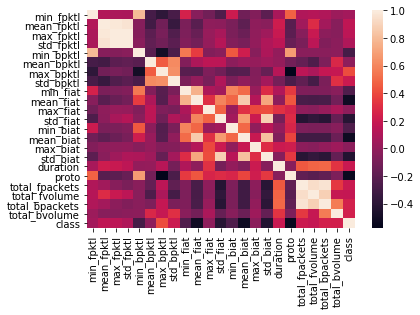

In [5]:
# Correlation Matrix
corr = sampled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.set(rc={'figure.figsize':(10,10)})
sns

In [6]:
# Removing the 6 features out of 22 which weren't used in the Decision Tree
sampled_df=sampled_df.drop(['min_bpktl'],axis=1)
sampled_df=sampled_df.drop(['max_fiat'],axis=1)
sampled_df=sampled_df.drop(['std_fiat'],axis=1)
sampled_df=sampled_df.drop(['mean_biat'],axis=1)
sampled_df=sampled_df.drop(['duration'],axis=1)
sampled_df=sampled_df.drop(['total_bvolume'],axis=1)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10152 entries, 0 to 10151
Data columns (total 17 columns):
min_fpktl         10152 non-null int64
mean_fpktl        10152 non-null int64
max_fpktl         10152 non-null int64
std_fpktl         10152 non-null int64
mean_bpktl        10152 non-null int64
max_bpktl         10152 non-null int64
std_bpktl         10152 non-null int64
min_fiat          10152 non-null int64
mean_fiat         10152 non-null int64
min_biat          10152 non-null int64
max_biat          10152 non-null int64
std_biat          10152 non-null int64
proto             10152 non-null int64
total_fpackets    10152 non-null int64
total_fvolume     10152 non-null int64
total_bpackets    10152 non-null int64
class             10152 non-null int64
dtypes: int64(17)
memory usage: 1.3 MB


<module 'seaborn' from '/home/abdsamadh/.virtualenvs/dlworkspace/lib/python3.6/site-packages/seaborn/__init__.py'>

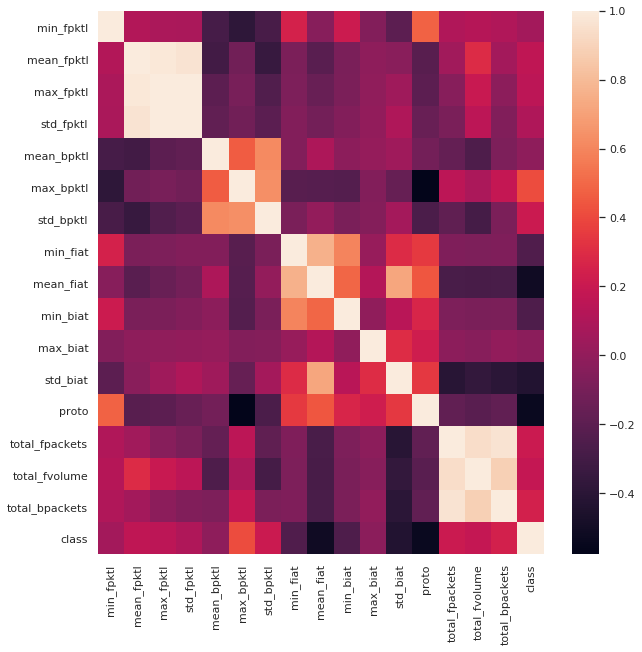

In [7]:
# Correlation Matrix
corr = sampled_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.set(rc={'figure.figsize':(10,10)})
sns

In [8]:
# Dividing into training and testing sets 80:20
X = sampled_df.drop(['class'],axis=1)
y = np.ravel(sampled_df['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# Scaling the inputs
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(16,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(11,activation='softmax'))

In [11]:
model.summary();

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                187       
Total params: 1,259
Trainable params: 1,259
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Training the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history = model.fit(X_train, y_train,epochs=100, batch_size=32, verbose=1,validation_data=(X_test,y_test))

Train on 8121 samples, validate on 2031 samples
Epoch 1/100
8121/8121 [==============================] - 1s 128us/step - loss: 1.4250 - acc: 0.5470 - val_loss: 0.7104 - val_acc: 0.7710
Epoch 2/100
8121/8121 [==============================] - 1s 119us/step - loss: 0.5775 - acc: 0.7901 - val_loss: 0.4434 - val_acc: 0.8188
Epoch 3/100
8121/8121 [==============================] - 1s 104us/step - loss: 0.4307 - acc: 0.8309 - val_loss: 0.3558 - val_acc: 0.8661
Epoch 4/100
8121/8121 [==============================] - 1s 131us/step - loss: 0.3745 - acc: 0.8508 - val_loss: 0.3130 - val_acc: 0.8690
Epoch 5/100
8121/8121 [==============================] - 1s 127us/step - loss: 0.3425 - acc: 0.8600 - val_loss: 0.2832 - val_acc: 0.8882
Epoch 6/100
8121/8121 [==============================] - 1s 166us/step - loss: 0.3183 - acc: 0.8648 - val_loss: 0.2617 - val_acc: 0.8804
Epoch 7/100
8121/8121 [==============================] - 1s 167us/step - loss: 0.2969 - acc: 0.8730 - val_loss: 0.2440 - val_acc: 

8121/8121 [==============================] - 1s 165us/step - loss: 0.0962 - acc: 0.9706 - val_loss: 0.0797 - val_acc: 0.9719
Epoch 61/100
8121/8121 [==============================] - 1s 174us/step - loss: 0.0917 - acc: 0.9724 - val_loss: 0.0749 - val_acc: 0.9838
Epoch 62/100
8121/8121 [==============================] - 2s 200us/step - loss: 0.0950 - acc: 0.9704 - val_loss: 0.0852 - val_acc: 0.9774
Epoch 63/100
8121/8121 [==============================] - 2s 199us/step - loss: 0.0900 - acc: 0.9723 - val_loss: 0.0721 - val_acc: 0.9828
Epoch 64/100
8121/8121 [==============================] - 2s 199us/step - loss: 0.0925 - acc: 0.9714 - val_loss: 0.0711 - val_acc: 0.9818
Epoch 65/100
8121/8121 [==============================] - 2s 200us/step - loss: 0.0872 - acc: 0.9717 - val_loss: 0.0728 - val_acc: 0.9788
Epoch 66/100
8121/8121 [==============================] - 2s 201us/step - loss: 0.0863 - acc: 0.9746 - val_loss: 0.0696 - val_acc: 0.9833
Epoch 67/100
8121/8121 [=======================

<Figure size 432x288 with 0 Axes>

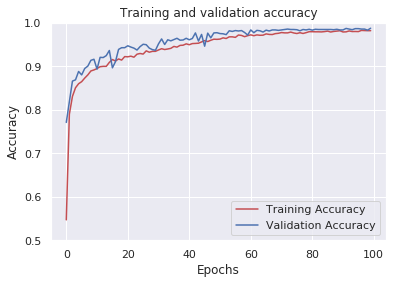

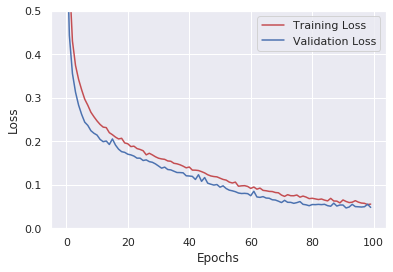

<Figure size 432x288 with 0 Axes>

In [13]:
# Plotting accuracy and loss

%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label="Training Accuracy",)
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.ylim(0.5, 1.0)
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,0.5)
plt.legend(loc='upper right')
plt.figure()

In [14]:
# Model prediction stats
y_pred = model.predict(X_test)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))
print(confusion_matrix(y_test, y_pred_bool))
print("\nMap to class id and class name: ")
print(json.dumps(class_dict, indent=4, sort_keys=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       195
           1       0.95      0.97      0.96        65
           2       0.98      0.98      0.98       201
           3       1.00      0.99      1.00       168
           4       0.98      0.98      0.98       200
           5       1.00      0.99      1.00       195
           6       1.00      0.97      0.98       190
           7       0.96      0.99      0.97       217
           8       0.99      0.98      0.98       204
           9       0.99      1.00      0.99       202
          10       1.00      1.00      1.00       194

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

[[195   0   0   0   0   0   0   0   0   0   0]
 [  0  63   2   0   0   0   0   0   0   0   0]
 [  0   1 197   0   3   0   0   0   0   0   0]
 [  0   1   0 167   0   0   0   0   0   0   0]